In [1]:
import torch, torch.nn as nn, copy, timeit, numpy.random as npr, numpy as np
from torch.distributions.bernoulli import Bernoulli 
from time import time
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import plot, show, legend
from scipy.stats import uniform, gaussian_kde
import seaborn as sns

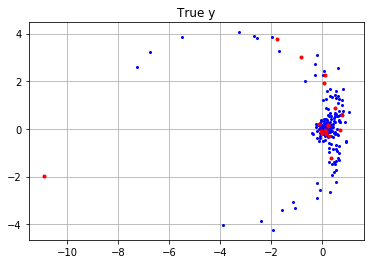

In [45]:
n_in = 1
n_out = 2
error_sigma2 = 0.05
Nobs = 200
n_ref = 20
X = torch.randn(Nobs, n_in, requires_grad=True)
X = X.data
Y = np.zeros((Nobs, n_out))
Y[:,0] = list(X**2*np.cos(X))
Y[:,1] = list(X**2*np.sin(X))
Y = torch.from_numpy(Y).float() + torch.randn(Nobs,2)*np.sqrt(error_sigma2)
criterion = nn.MSELoss()
plt.plot(list(Y[:,0]), list(Y[:,1]), 'bo', markersize=2)
plt.grid(True)
plt.title("True y");
ref = npr.choice(Nobs,n_ref)
plt.plot(list(Y[ref,0]), list(Y[ref,1]), 'ro', markersize=3)

In [4]:
np.shape(Y)

torch.Size([10000, 2])

In [5]:
kernel = gaussian_kde(np.transpose(Y))

In [7]:
positions = 7*npr.randn(2,1000)
den = kernel(np.transpose(Y));

In [8]:
sum(den)

9.75623210523637

In [40]:
kernel([15,-5])

array([6.13008945e-05])

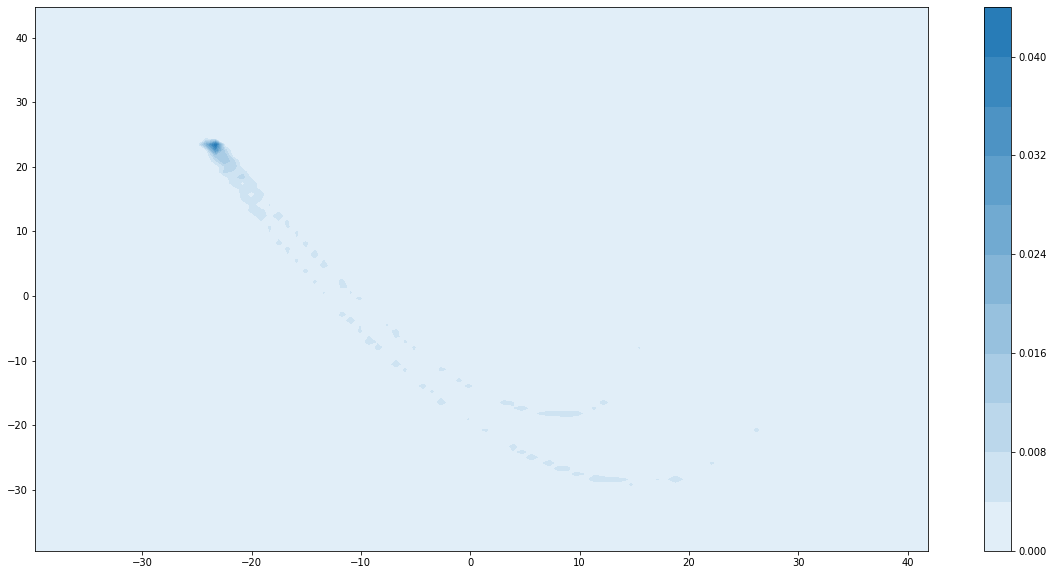

In [52]:
plt.figure(figsize=(20,10))
ax = sns.kdeplot(Y[:,0].numpy(), Y[:,1].numpy(), shade=True, cbar=True, bw=1e-2)